## Part 1: Minimum-Tracking-Error Frontier

### Let the market return be the target return. Estimate the expected deviation from market return, for the ten industry portfolios:

### Ri=E(R̃ i−R̃ m)
### Also estimate the covariance matrix of return deviations, for the ten industry portfolios:

### Vij=Cov[(R̃ i−R̃ m),(R̃ j−R̃ m)]
### Plot the minimum-tracking-error frontier generated by the ten industry portfolios, with expected return deviation on the vertical axis and tracking error on the horizontal axis. The plot should cover the range from 0% to 0.1% on the vertical axis, in increments of 0.005% (or less). 

### Also plot the line starting from the origin that is tangent to the upper half of the minimum-tracking-error frontier, and calculate the information ratio and portfolio weights for the "tangency" portfolio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
import quandl
from scipy.optimize import minimize
from pandas import Series
from pandas import DataFrame

In [2]:
rf = pd.read_csv('Risk_Factors.csv',index_col=0,parse_dates=True)
df = pd.read_csv('Industry_Portfolios.csv',index_col=0,parse_dates=True)
mk = pd.read_csv('Market_Portfolio.csv',index_col=0,parse_dates=True)

In [3]:
stock_names = df.columns 

In [4]:
df  = df.apply(lambda x: x-mk['Market'])
df

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,-2.16,-3.29,-2.84,-1.78,2.31,-0.81,-1.77,0.87,-0.30,0.66
200402,2.79,-1.53,0.49,3.23,-4.38,-1.98,4.63,-0.57,0.61,0.70
200403,1.14,0.08,0.96,1.10,-1.32,-0.84,1.52,-2.73,2.36,0.60
200404,3.17,4.05,1.58,4.27,-3.16,1.27,-0.95,5.29,-1.80,-2.01
200405,-3.12,-2.87,0.38,-0.84,3.62,-4.18,-0.93,-1.65,0.05,0.63
...,...,...,...,...,...,...,...,...,...,...
201308,-1.31,1.69,0.74,0.86,2.57,-0.59,-1.52,-0.80,-1.74,-0.97
201309,-1.82,2.70,1.44,-1.73,0.01,0.57,0.70,0.43,-2.71,0.07
201310,0.58,-3.45,0.39,0.69,-0.37,1.35,0.91,-0.70,-0.82,-0.30


In [5]:
returns=df.mean()

In [6]:
R = returns.values

In [7]:
R = R.reshape((10, 1))

In [8]:
R_table = pd.DataFrame(data = R, columns = ['Mean'])
R_table

,Mean
0,0.154750
1,-0.014750
2,0.264750
3,0.483083
4,0.018167
5,0.133333
6,0.168250
7,0.035750
8,0.159083
9,-0.259000


In [9]:
# Calculate the Covariance matrix
cov=df.cov()

In [10]:
cov

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,5.439696,-6.073035,-1.396192,-1.200533,-1.883151,1.538885,1.140741,3.815137,4.272002,-1.768738
Durbl,-6.073035,26.628901,4.908024,-3.481055,1.891577,-1.707625,-0.354335,-8.082946,-9.617490,4.385865
Manuf,-1.396192,4.908024,2.950499,1.666133,0.065267,-0.626416,-1.154597,-2.288900,-1.901412,0.358904
Enrgy,-1.200533,-3.481055,1.666133,19.274911,-1.516972,-1.040525,-3.710439,-2.485796,4.454368,-3.864826
HiTec,-1.883151,1.891577,0.065267,-1.516972,5.098746,-0.773294,-0.245350,-1.936284,-2.342839,-1.404050
Telcm,1.538885,-1.707625,-0.626416,-1.040525,-0.773294,4.682567,0.463797,0.693157,2.721477,-1.271778
Shops,1.140741,-0.354335,-1.154597,-3.710439,-0.245350,0.463797,4.452628,0.764510,-0.176666,-0.256987
Hlth,3.815137,-8.082946,-2.288900,-2.485796,-1.936284,0.693157,0.764510,7.820446,3.496136,-1.726842
Utils,4.272002,-9.617490,-1.901412,4.454368,-2.342839,2.721477,-0.176666,3.496136,12.267476,-4.055112
Other,-1.768738,4.385865,0.358904,-3.864826,-1.404050,-1.271778,-0.256987,-1.726842,-4.055112,4.503204


In [11]:
cov2 = df.cov().values

In [12]:
cov2

array([[ 5.43969574, -6.07303523, -1.39619166, -1.20053326, -1.88315088,
         1.53888487,  1.14074116,  3.81513716,  4.27200187, -1.7687384 ],
       [-6.07303523, 26.62890078,  4.90802359, -3.48105498,  1.89157693,
        -1.70762521, -0.35433527, -8.08294641, -9.61749011,  4.38586529],
       [-1.39619166,  4.90802359,  2.9504991 ,  1.66613313,  0.06526676,
        -0.62641597, -1.15459666, -2.28889981, -1.90141158,  0.35890361],
       [-1.20053326, -3.48105498,  1.66613313, 19.27491058, -1.51697245,
        -1.04052465, -3.7104391 , -2.48579603,  4.4543684 , -3.8648258 ],
       [-1.88315088,  1.89157693,  0.06526676, -1.51697245,  5.09874619,
        -0.77329384, -0.24535029, -1.93628433, -2.34283867, -1.40405025],
       [ 1.53888487, -1.70762521, -0.62641597, -1.04052465, -0.77329384,
         4.68256695,  0.46379748,  0.69315714,  2.72147703, -1.27177815],
       [ 1.14074116, -0.35433527, -1.15459666, -3.7104391 , -0.24535029,
         0.46379748,  4.452628  ,  0.76451015

#### Create a table showing the mean returns and standard deviation of returns for the ten industry portfolios.

In [13]:
### Creat Standard deviation 
SD=df.std()

In [14]:
table=pd.concat([returns,SD],axis=1)
table

,0,1
NoDur,0.154750,2.332316
Durbl,-0.014750,5.160320
Manuf,0.264750,1.717702
Enrgy,0.483083,4.390320
HiTec,0.018167,2.258040
Telcm,0.133333,2.163924
Shops,0.168250,2.110125
Hlth,0.035750,2.796506
Utils,0.159083,3.502496
Other,-0.259000,2.122075


In [15]:
SD = SD.values
SD

array([2.33231553, 5.16031983, 1.71770169, 4.3903201 , 2.25804034,
       2.16392397, 2.11012512, 2.79650612, 3.50249563, 2.12207541])

In [16]:
table.columns = ['mean returns', 'standard deviation']
table

,mean returns,standard deviation
NoDur,0.154750,2.332316
Durbl,-0.014750,5.160320
Manuf,0.264750,1.717702
Enrgy,0.483083,4.390320
HiTec,0.018167,2.258040
Telcm,0.133333,2.163924
Shops,0.168250,2.110125
Hlth,0.035750,2.796506
Utils,0.159083,3.502496
Other,-0.259000,2.122075


#### Calculate the unit vector, alpha, zeta and gamma

In [17]:
e=np.ones((10,1))

#### Calculate the inverse of cov matrix

In [18]:
inverseV = np.linalg.inv(cov2)
inverseV.shape


(10, 10)

In [19]:
alpha = reduce(np.dot, [R.T,inverseV, e])[0][0]
zeta=reduce(np.dot, [R.T,inverseV, R])[0][0]
delta=reduce(np.dot, [e.T,inverseV, e])[0][0]

In [20]:
alpha 

2.932127882630612

### Function: varaince of R on frontier

In [21]:
total_stock=len(df.columns) #n=10
min_std=[]
limit_var=np.linspace(0.0,0.1,200)

In [22]:
print(delta)

58.55025437639891


In [23]:
for R0 in limit_var:
    variance_of_return= (delta*(R0**2)-(2*R0*alpha)+zeta)/(zeta*delta-alpha*alpha)
    min_std.append(np.sqrt(variance_of_return))

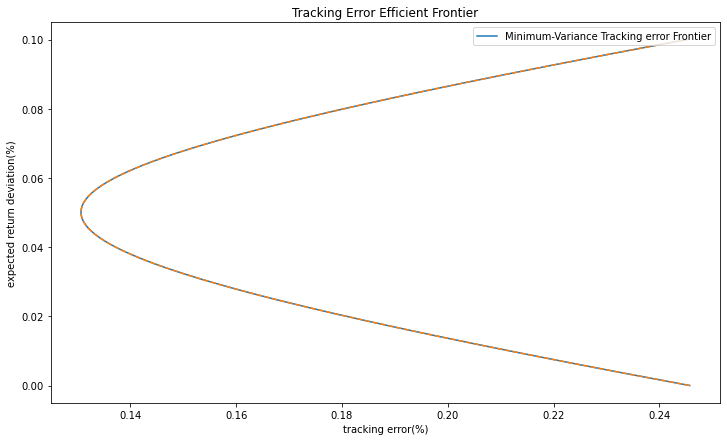

In [24]:
plt.figure(figsize=(12,7))
plt.plot(min_std,limit_var,label='Minimum-Variance Tracking error Frontier')
plt.plot(min_std, limit_var, '--')

plt.xlabel('tracking error(%)')
plt.ylabel('expected return deviation(%)')  
plt.title('Tracking Error Efficient Frontier')
plt.legend(loc = 'upper right')
plt.show()

### Calculate Return of Tangency Portfolio


In [25]:
rtg= (- zeta) / (- alpha)
rtg

0.06982811859065603

In [26]:
sigmatg = -zeta**0.5 / (delta * (- alpha / delta))
sigmatg

0.1543205336644371

### Calculate information ratio $ir$

In [27]:
ir = rtg / sigmatg
ir

0.452487539619932

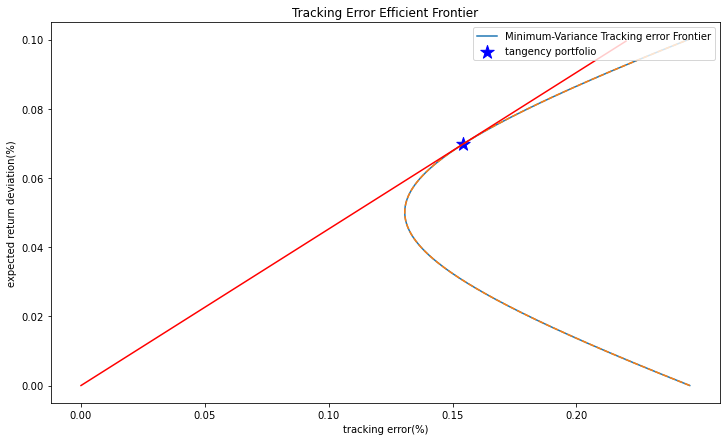

In [28]:
plt.figure(figsize=(12,7))
plt.plot(min_std,limit_var,label='Minimum-Variance Tracking error Frontier')
plt.plot(min_std, limit_var, '--')
plt.plot([0, 0.22], [0, 0.22 * ir], c='r')
plt.scatter(sigmatg, rtg, s=200, c='b', marker='*', label='tangency portfolio')

plt.xlabel('tracking error(%)')
plt.ylabel('expected return deviation(%)')  
plt.title('Tracking Error Efficient Frontier')
plt.legend(loc = 'upper right')
plt.xticks(np.arange(0, 0.25, 0.05))
plt.show()

## Hansen-Jagannathan Bound


#### define sample size

In [29]:
s=10000

#### Define rare disaster rate

In [30]:
r_disaster_rate = 0.017

#### Simulate ϵ with 10000 random draws from a standard normal distribution

In [31]:
epsilon = np.random.randn(s)
epsilon

array([ 0.33969974, -2.0810066 ,  0.22593496, ..., -0.30516381,
        1.99769551,  1.07681018])

####  Simulate $\nu$ with 10000 random draws from a standard uniform distribution

In [32]:
mu=np.random.uniform(0,1,s)

In [33]:
mu

array([0.46755447, 0.10140228, 0.18620157, ..., 0.86253513, 0.40520646,
       0.17250047])

#### Rare disaster $\nu$ has value of either zero (probability 98.3%) or ln(0.65) (with probability 1.7%)


In [34]:

n = []
val = np.log(0.65)
for i in mu:
    if i <= r_disaster_rate:
        n.append(val)
    else:
        n.append(0.0)
      

In [35]:
nu_values = np.array(n)
nu_values

array([0., 0., 0., ..., 0., 0., 0.])

#### there should be around 170 with value ln(0.65)

### consumption growth has a lognormal distribution with the possibility of rare disasters:

## $\ln$$g̃$ =0.02+0.02$ϵ̃$ +$ν̃$ 

### Define $g̃$ value

In [36]:
g = []
for i in np.arange(0, s):
    g_val = np.exp(0.02 + 0.02 * epsilon[i] + nu_values[i])
    g.append(g_val)

In [37]:
G = np.array(g)

In [38]:
G

array([1.02715618, 0.97861191, 1.02482175, ..., 1.01399373, 1.06178761,
       1.0424109 ])

### Calculate the mean and standard deviation of the pricing kernel for each values of 𝛾, and plot the ratio SD(M)/E(M) (on the vertical axis) vs 𝛾 (on the horizontal axis). 

### for 𝛾 in the range [1,4], in increments of 0.1 (or less).

In [47]:
gamma0 = []
ratio0 = []
for gamma in np.arange(1, 4, 0.01):
    M = 0.99 / G ** gamma
    ratio = M.std() / M.mean()
    gamma0.append([gamma])
    ratio0.append([ratio])

In [48]:
ratio = pd.DataFrame(data=ratio0)
gamma = pd.DataFrame(data=gamma0)

In [49]:
gamma = gamma.rename(columns = {0: 'gamma'}, inplace = False)
ratio  = ratio .rename(columns = {0: 'Ratio'}, inplace = False)

In [50]:
table = pd.concat([gamma,ratio],axis=1)
table

,gamma,Ratio
0,1.00,0.073693
1,1.01,0.074581
2,1.02,0.075473
3,1.03,0.076368
4,1.04,0.077266
...,...,...
295,3.95,0.558558
296,3.96,0.561268
297,3.97,0.563987
298,3.98,0.566716


In [51]:
table_above_04 = table[table.Ratio>=0.4]
table_above_04 

,gamma,Ratio
230,3.30,0.401748
231,3.31,0.403890
232,3.32,0.406040
233,3.33,0.408198
234,3.34,0.410363
...,...,...
295,3.95,0.558558
296,3.96,0.561268
297,3.97,0.563987
298,3.98,0.566716


In [52]:
table_above_04[0:1]

,gamma,Ratio
230,3.3,0.401748


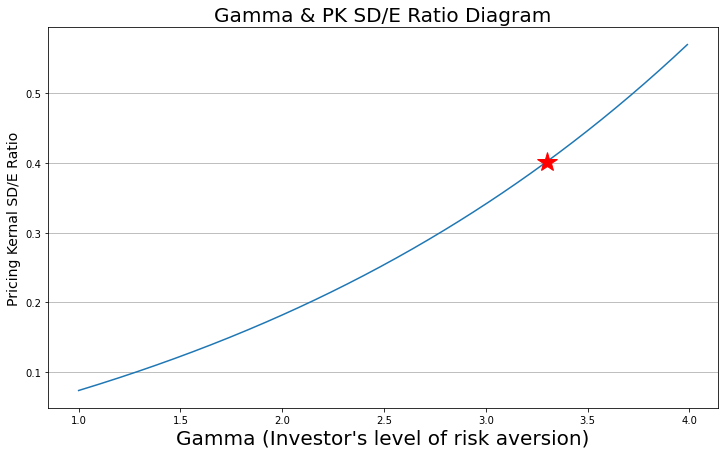

In [53]:
plt.figure(figsize=(12,7))
plt.xlabel('Gamma (Investor\'s level of risk aversion)', fontsize=20)
plt.ylabel('Pricing Kernal SD/E Ratio', fontsize=14)
plt.title('Gamma & PK SD/E Ratio Diagram', fontsize=20)

plt.plot(table['gamma'], table['Ratio'])
plt.plot(table_above_04['gamma'][0:1],table_above_04['Ratio'][0:1],'b*',color = 'red',markersize=20)
plt.grid(axis='y')
plt.show()

## Briefly explain the economic significance of this result.

## Ans: According to Hansen Jagannathan bound, $σ_m$$/$$E[\hat M]$ ≈$γ$$σ_c$≥$|$($E[\hat R_i ]$-$R_f$)/$σ_i$$|$
### 1. LHS is almost equal to standard deviation of pricing kernel, while RHS is Sharpe ratio of any portfolio of risky assets. 

### 2. Hence, standard deviation of pricing kernel cannot be less than highest Sharpe ratio out of all possible portfolios.

## For the economic significance of this result
### 1. Gamma is (constant) coefficient of relative risk aversion for power utility
### 2. Gamma determines volatility of pricing kernel for power utility, so H–J bound sets lower bound on gamma

## According to historical data of U.S. stock market, the Sharpe Ratio of market portfolio is around 0.4.

## So if  $σ_c$≈ 2% per year. We got the $γ$≥20, representing the equity premium puzzle

## When using the simulated data to calculate the level of risk aversion, given $σ_m$$/$$E[\hat M]$ ≥0.4, we could get the $γ$ ≥ 3.3. This result is much smaller than the result calculated from historical data, and is also reasonable.

## So we can conclude that H–J bound is satisfied with gamma < 4 for consumption growth with rare disasters and Reasonable level of relative risk aversion, so no equity premium puzzle


## It also appears that the Hansen-Jagannathan Bound inequality dose not hold for U.S. stock market data and standard specifications of utility. 